In [57]:
import pandas as pd
from dataprep.eda import create_report
from dataprep.eda import plot;
import sweetviz as sv
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import plotly.express as px
from bioinfokit.visuz import cluster
from IPython.display import Image
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

In [9]:
df = pd.read_csv("data/adult1.csv", index_col=0)
df.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income_label  
0          2174             0              40   United-States             0  
1             0             0              13   United-States             0  
2             0             0              40   United-States             0  
3             0             0              40   United-States             0  
4             0             0              40            Cuba             0

## Now we use API - 'dataprep' to create explanatory report on our data

#### After the two lines bellow are executed, you will find a html report ('DataOverview_dataprep_report.html') in the folder Reports

#### For more examples [Link](https://analyticsindiamag.com/exploring-dataprep-a-python-library-for-data-preparation-eda/)

In [25]:
report = create_report(df)
report.save('Reports/DataOverview_dataprep_report.html') # save report to local disk

  0%|          | 0/1996 [00:00<?, ?it/s]

Report has been saved to Reports/DataOverview_dataprep_report.html!


## We can create similar report with API - 'sweetviz' 

In [52]:
os.chdir('/home/evdo/Documents/InterviewDataScientist/')

In [53]:
df = pd.read_csv("data/adult1.csv", index_col=0)
#df1 = df.drop_duplicates(keep=False)
#df1 = df.dropna()

#### After the two lines bellow are executed, you will find a html report ('DataOverview_sweetviz_report.html') in the folder Reports

#### For more examples [Link](https://coderzcolumn.com/tutorials/data-science/sweetviz-automate-exploratory-data-analysis-eda)

In [58]:
analyze_report = sv.analyze(df, target_feat="capital_gain")
analyze_report.show_html('Reports/DataOverview_sweetviz_report.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report Reports/DataOverview_sweetviz_report.html was generated.


## PCA plot - dimension reduction

##### If you would like to know more about PCA please follow the [link.](https://www.sartorius.com/en/knowledge/science-snippets/what-is-principal-component-analysis-pca-and-how-it-is-used-507186)

In [6]:
df = pd.read_csv("data/adult1.csv", index_col=0)
df1 = df.drop_duplicates(keep=False)
df1 = df1.dropna() # we remove all the the NAN values
df1.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income_label  
0          2174             0              40   United-States             0  
1             0             0              13   United-States             0  
2             0             0              40   United-States             0  
3             0             0              40   United-States             0  
4             0             0              40            Cuba             0

#### we define categorical and numerical columns

In [7]:
categorical_columns = ['workclass', 'education', 'marital_status', 'relationship',
                      'race', 'sex', 'native_country', 'occupation']

numerical_columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 
                     'capital_loss', 'hours_per_week', 'income_label']

In [37]:
for category in categorical_columns:
    df1[category] = df1[category].astype('category')
    
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30117 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30117 non-null  float64 
 1   workclass       30117 non-null  category
 2   fnlwgt          30117 non-null  float64 
 3   education       30117 non-null  category
 4   education_num   30117 non-null  float64 
 5   marital_status  30117 non-null  category
 6   occupation      30117 non-null  category
 7   relationship    30117 non-null  category
 8   race            30117 non-null  category
 9   sex             30117 non-null  category
 10  capital_gain    30117 non-null  float64 
 11  capital_loss    30117 non-null  float64 
 12  hours_per_week  30117 non-null  float64 
 13  native_country  30117 non-null  category
 14  income_label    30117 non-null  float64 
dtypes: category(8), float64(7)
memory usage: 2.1 MB


In [29]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()  
# for PCA the data is Standard scalled (a regular procedure in order to copmare variables with different units)

df2=df1
df2[numerical_columns] = stdsc.fit_transform(df2[numerical_columns].values)


n_components = 2  # we show only the first 2 components... please, change that parameter to 3,4... if you need more

pca = PCA(n_components=n_components)
components = pca.fit_transform(df2[numerical_columns])

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}


total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_matrix(
    components,
    color=df2['capital_gain'],  # here 'race' can be changed to any other categorical or numerical factor
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%'
)
fig.update_traces(diagonal_visible=False)
fig.show()

#### On the figure above we see one little separation cluster, and we wonder which variable in our data is responsible for that

#### In order to answer that question we create a so called BIPlot, which allows us to to identify which variables are 'pooling' the separation of juts that cluster

In [10]:
pca_out = PCA().fit(df2[numerical_columns])

# get the component variance
# Proportion of Variance (from PC1 to PC6)
pca_out.explained_variance_ratio_

array([0.2468046 , 0.14867103, 0.14520927, 0.13435165, 0.12739889,
       0.11502995, 0.08253461])

In [13]:
# Cumulative proportion of variance (from PC1 to PC6)   
np.cumsum(pca_out.explained_variance_ratio_)

array([0.2468046 , 0.39547563, 0.5406849 , 0.67503654, 0.80243544,
       0.91746539, 1.        ])

In [26]:
df2.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income_label'], dtype=object)

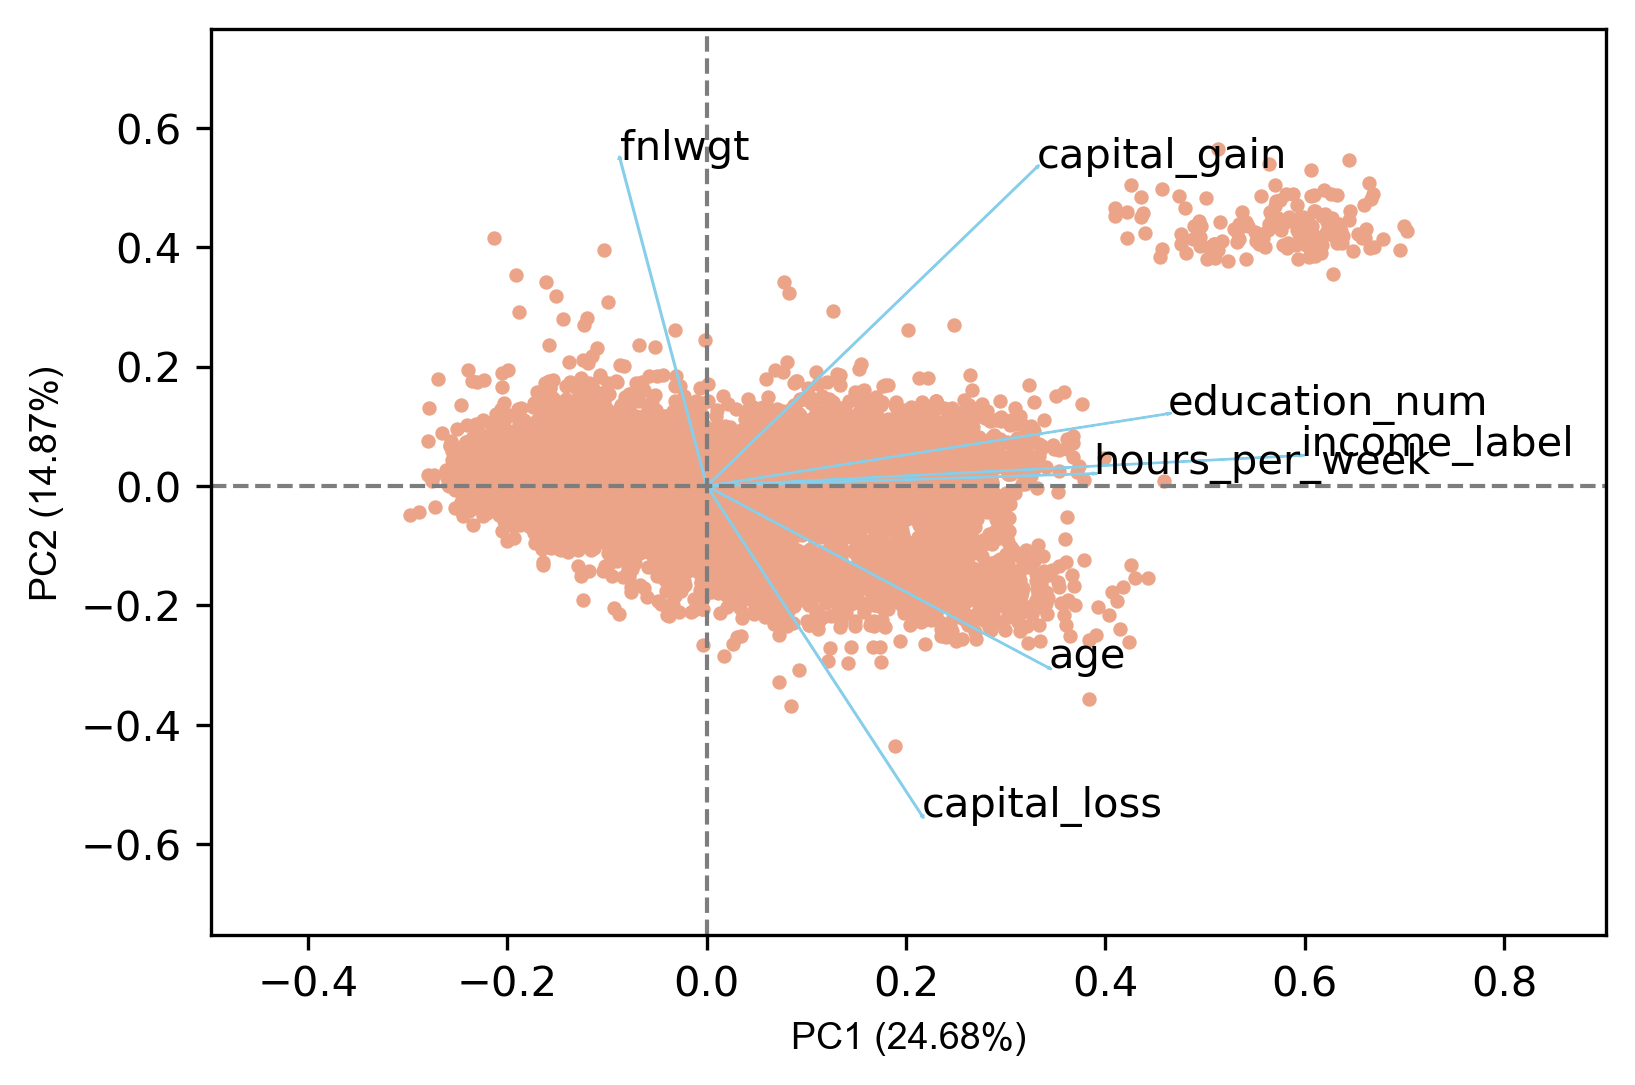

In [28]:
# get PC scores
pca_scores = PCA().fit_transform(df2[numerical_columns])

loadings = pca_out.components_

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df2[numerical_columns].columns,
               var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))
    

Image(filename='biplot_2d.png') 

#### On the plot above we see that 'capital_gain' is overlapping clearly with that cluster

In [ ]:
### Let's color our PCA groups based on 'capital_gain' to see if this cluster is overrepresented by high capital gain

In [30]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()  
# for PCA the data is Standard scalled (a regular procedure in order to copmare variables with different units)

df2=df1
df2[numerical_columns] = stdsc.fit_transform(df2[numerical_columns].values)


n_components = 2  # we show only the first 2 components... please, change that parameter to 3,4... if you need more

pca = PCA(n_components=n_components)
components = pca.fit_transform(df2[numerical_columns])

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}


total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_matrix(
    components,
    color=df2['capital_gain'],  # here 'race' can be changed to any other categorical or numerical factor
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%'
)
fig.update_traces(diagonal_visible=False)
fig.show()

### Indeed the cluster shows highest capital gain

##### Let's assume we would like to create train & test set, which supposedly can be used for training and validation of a model

In [41]:
# Separating X and y
X = df.drop('sex', axis=1)
y = df['sex']

In [42]:
#splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Creating the comparison report between Train versus Test,

In [59]:
compare_report = sv.compare([X_train, 'Train'], [X_test, 'Test'])
compare_report.show_html('compare_report_sweetviz_report.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report compare_report_sweetviz_report.html was generated.
